# Data Wrangling
Gathering Data for this Project:
1. The WeRateDogs Twitter archive :  twitter_archive_enhanced.csv
2. The tweet image predictions : image_predictions.tsv 
3. Twitter API

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
import glob
%matplotlib inline

In [2]:
# import 1
path = "twitter-archive-enhanced.csv"
df_1 = pd.read_csv(path)
df_1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
#import 2 
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# Save tsv to file 
with open("image-predictions.tsv",mode='wb') as file: 
    file.write(response.content)

In [5]:
path2 = 'image-predictions.tsv'
df_2 = pd.read_csv(path2, sep = '\t')
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [6]:
#import 3 
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
with open(r'C:\Users\Free\Web scraping\4. Data Wrangling\Udacity tweepy code\tweet-json_.txt', encoding='utf-8') as file:
    for i in range(2355):
        tweet = file.readline() 
        # Append to list of dictionaries
        df_list.append({'tweet': tweet
                       })
df_3 = pd.DataFrame(df_list, columns = ['tweet'])
df_3

,tweet
0,"{""created_at"": ""Tue Aug 01 16:23:56 +0000 2017..."
1,"{""created_at"": ""Tue Aug 01 00:17:27 +0000 2017..."
2,"{""created_at"": ""Mon Jul 31 00:18:03 +0000 2017..."
3,"{""created_at"": ""Sun Jul 30 15:58:51 +0000 2017..."
4,"{""created_at"": ""Sat Jul 29 16:00:24 +0000 2017..."
...,...
2350,"{""created_at"": ""Mon Nov 16 00:04:52 +0000 2015..."
2351,"{""created_at"": ""Sun Nov 15 23:21:54 +0000 2015..."
2352,"{""created_at"": ""Sun Nov 15 23:05:30 +0000 2015..."
2353,"{""created_at"": ""Sun Nov 15 22:32:08 +0000 2015..."


# Visual + Programmic Assessment

In [7]:
# shape of dataframes for 3 data sources
print(f'df_1 shape: {df_1.shape}, df_2 shape :{df_2.shape}, df_3 shape :{df_3.shape}')

df_1 shape: (2356, 17), df_2 shape :(2075, 12), df_3 shape :(2355, 1)


In [8]:
# info of dataframes for 3 data sources
print(f'df_1: {df_1.info()}, df_2 :{df_2.info()}, df_3 :{df_3.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# Note None should be changed to NaN for several cols
df_1["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [10]:
df_2["p3_dog"].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [11]:
# check df_1 integer/float/timestamp don't contain alphabetical characters
cols_df1 = "tweet_id" , "timestamp", "rating_numerator", "rating_denominator"
for i in cols_df1:
    jj = df_1[i].astype(str).str.contains(r'[^0-9+-:\s]').sum()
    print(f'{i} : {jj}')

tweet_id : 0
timestamp : 0
rating_numerator : 0
rating_denominator : 0


In [12]:
# check df_1 integer/float/timestamp don't contain alphabetical characters
cols_df2 = "tweet_id", "img_num", "p1_conf", "p2_conf", "p3_conf"
for i in cols_df2:
    jj = df_2[i].astype(str).str.contains(r'[^0-9+-:.\s]').sum()
    print(f'{i} : {jj}')

tweet_id : 0
img_num : 0
p1_conf : 0
p2_conf : 18
p3_conf : 36


In [13]:
# check contains statement results
n=df_2[df_2["p2_conf"].astype(str).str.contains(r'[^0-9+-:.\s]')==True]
n2=df_2[df_2["p3_conf"].astype(str).str.contains(r'[^0-9+-:.\s]')==True]

In [14]:
# additional character is e for both p2_conf + p3_conf
n["p2_conf"]

45      5.514170e-05
95      8.106320e-05
106     1.011300e-08
149     4.309810e-05
230     1.763430e-05
242     2.987300e-05
331     8.675670e-05
475     5.867490e-05
594     7.191480e-05
865     9.758170e-05
1229    1.448950e-05
1299    1.002880e-05
1372    2.335910e-05
1447    7.657020e-05
1455    5.644850e-05
1687    6.780610e-05
1711    6.229490e-05
1796    4.629670e-05
Name: p2_conf, dtype: float64

dirty data = content issues. also known as low quality data, includes innacurate data + corrupted data + duplicated data
Messy data = structural issues, also known as untidy.
Tidy data - each variable forms a col, each obs forms a row, each observational unit forms a table


## Assessing
### Quality issues (minimum of 8)
1. df_1 table : for name col NaN is labelled as None
2. df_1 table : for doggo col NaN is labelled as None 
3. df_1 table : for floofer col NaN is labelled as None 
4. df_1 table : for pupper col NaN is labelled as None
5. df_1 table : for puppo col NaN is labelled as None
6. df_1 table : missing in_reply_to_status_id, missing retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp data   in_reply_to_user_id  
7. df_1 table : expanded_urls column contains more than one observation
8. df_1 table : Source column contains tags
9. df_2 table : p1_conf, p2_conf and p3_conf number of decimal places is not consistent
10. missing records (df_1: 2356 vs df_2: 2075 vs df_3: 2354 > last row is empty)


### Two tidiness issues
1. df_3 - Each variable does not form a column
2. df_3 - Each observation does not form a row

## Cleaning

##### df_1

In [15]:
# df_1 Extracting source link + text
df_1clean = df_1.copy()
df_1clean["source_link"] = df_1clean["source"].str.extract(r'((http)://[a-zA-Z.]+/\w+/\w+)')[0].str.split('/',expand=True)[:-1][4]
df_1clean["source_text"] = df_1clean["source"].str.extract(r'((">)[a-zA-Z]+\s\w+\w\s\w+)')[0].str.split('>', expand=True)[1]
df_1clean.drop("source",  axis = 1, inplace=True)
df_1clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_link,source_text
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,iphone,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,iphone,Twitter for iPhone


In [16]:
# replace None with NaN for df_1
df_1clean = df_1clean.replace('None', np.nan, regex=True)
# check count of nulls has changed for name,doggo,floofer,pupper,puppo                                            
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   text                        2354 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        1611 non-null   object 
 12  doggo                       97 non-null     object 
 13  floofer                     10 no

In [17]:
df_1clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_link,source_text
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,iphone,Twitter for iPhone


#### df_2

In [18]:
# round df_2 to 4 decimal places 
df_2clean = df_2.copy()
df_2clean = df_2clean.round({'p1_conf': 4, "p2_conf" : 4, "p3_conf": 4})
df_2clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.4651,True,collie,0.1567,True,Shetland_sheepdog,0.0614,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.5068,True,miniature_pinscher,0.0742,True,Rhodesian_ridgeback,0.0720,True


In [19]:
# Test e has been removed with rounding
cols_df2_clean = "p1_conf", "p2_conf", "p3_conf"
for i in cols_df2_clean:
    jj = df_2clean[i].astype(str).str.contains(r'[^0-9+-:.\s]').sum()
    print(f'{i} : {jj}')

p1_conf : 0
p2_conf : 0
p3_conf : 0


#### df_3

In [20]:
# df_3 Extracting 
df_3clean = df_3.copy()
df_3clean["tweet_id"] = df_3clean["tweet"].str.extract(r'([a-zA-Z"]+:\s[0-9]+)', expand=True)[0].str.split(':', expand=True)[1]
df_3clean["retweet_count"] = df_3clean["tweet"].str.extract(r'(("retweet_count")+:\s[0-9]+)', expand=True)[0].str.split(':', expand=True)[1]
df_3clean["favourite_count"] = df_3clean["tweet"].str.extract(r'(("favorite_count")+:\s[0-9]+)', expand=True)[0].str.split(':', expand=True)[1]
df_3clean = df_3clean[["tweet_id","retweet_count","favourite_count"]]
df_3clean.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
# save cleaned dataset
df_3clean.to_csv(r"C:\Users\Free\Web scraping\4. Data Wrangling\Udacity tweepy code\df_3cleam.csv")

#### Test df_3 output

In [22]:
# check no letters in columns
id = df_3clean["tweet_id"].str.contains(r'[a-zA-Z]').sum()
ret = df_3clean["retweet_count"].str.contains(r'[a-zA-Z]').sum()
fav = df_3clean["favourite_count"].str.contains(r'[a-zA-Z]').sum()

print(f'id : {id}')
print(f'retweet_count : {ret}')
print(f'favourite_count : {fav}')

id : 0
retweet_count : 0
favourite_count : 0


In [23]:
# dtypes need to be changed to int64
df_3clean.dtypes

tweet_id           object
retweet_count      object
favourite_count    object
dtype: object

In [24]:
#last row needs to be removed
df_3clean.tail()

,tweet_id,retweet_count,favourite_count
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535
2354,NaN,NaN,NaN


In [25]:
# remove last row
df_3clean.drop(2354, inplace=True)


df_3dtypes = "tweet_id","retweet_count","favourite_count"  
for i in df_3dtypes:
    df_3clean.astype(str).astype('int64')

In [26]:
# change dtypes
df_3clean = df_3clean.astype('int64') # changes dataframe to dtype. 

In [27]:
# check dtypes
df_3clean.dtypes

tweet_id           int64
retweet_count      int64
favourite_count    int64
dtype: object

In [28]:
# check all ids in col tweet_id table df_2 clean exists in df1_clean1
df_2["tweet_id"].isin(df_1["tweet_id"]).count()


2075

In [29]:
#Change Data Type of Multiple Columns in Dataframe
#empDfObj = empDfObj.astype({'Age': 'float64', 'Marks': 'object'})
# Handle errors while converting Data Types of Columns
# try:
#         empDfObj['Age'] = empDfObj['Age'].astype('abc')
# except TypeError as e:
#         print(e)

In [30]:
# check all ids in col tweet_id table df_3 clean exists in df1_clean1
df_3clean["tweet_id"].isin(df_1clean["tweet_id"]).sum()

2354

In [31]:
# Merge dataframes
a = df_1clean.copy()
g = df_2clean.copy()
v = df_3clean.copy()
df_final = pd.merge(pd.merge(g,a,on='tweet_id',how='outer'),v,on='tweet_id',how='outer')

In [32]:
# Output combined and cleaned data
df_final.to_csv(r"C:\Users\Free\Web scraping\4. Data Wrangling\Udacity tweepy code\twitter_archive_master.csv")

In [51]:
df_final.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,rating_denominator,name,doggo,floofer,pupper,puppo,source_link,source_text,retweet_count,favourite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.4651,True,collie,0.1567,True,Shetland_sheepdog,...,10,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,532.0,2535.0


# Analyzing + Visualization 

##### Is the source link all iphone?

In [91]:
lx = df_final["source_link"].value_counts(dropna= False, normalize=True)
lx
# All iphone

iphone    0.942275
NaN       0.057725
Name: source_link, dtype: float64

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Source'),
 Text(0.5, 1.0, 'Source Link')]

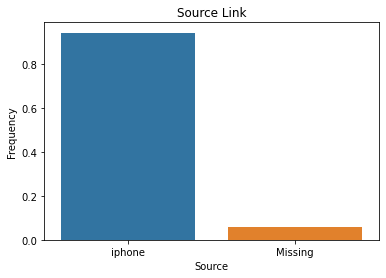

In [116]:
lx = df_final["source_link"].fillna('Missing').value_counts(dropna=False, normalize=True)
lx = sns.barplot(lx.index, lx.values)                # plotting NaN
lx.set(xlabel='Source', ylabel='Frequency', title= "Source Link")

##### Is it all via the Twitter application or via the web?

In [114]:
tx = df_final["source_text"].value_counts(dropna= False, normalize=True)
tx

Twitter for iPhone    0.942699
NaN                   0.043294
Twitter Web Client    0.014007
Name: source_text, dtype: float64

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Interface'),
 Text(0.5, 1.0, 'Source text')]

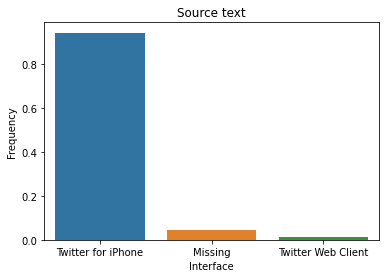

In [118]:
# plot source_text
tx = df_final["source_text"].fillna('Missing').value_counts(dropna=False, normalize=True)
tx = sns.barplot(tx.index, tx.values)
tx.set(xlabel='Interface', ylabel='Frequency', title= "Source text")

#### How many urls in expanded_urls?

In [201]:
expanded = df_final["expanded_urls"].str.split(',', expand=True).count()
expanded

0    2297
1     639
2     274
3     154
4      20
5      10
6       4
7       4
dtype: int64

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

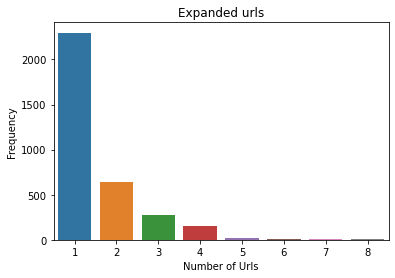

In [202]:
# plot expanded urls
ax = sns.barplot(expanded.index, expanded.values)
ax.set(xlabel='Number of Urls', ylabel='Frequency', title= "Expanded urls")
ax.set_xticklabels(['1','2','3','4','5','6','7','8'])

#### Retweet count distribution

In [129]:
df_final["retweet_count"].describe()

count     2354.000000
mean      3238.248938
std       5635.118698
min          0.000000
25%        621.250000
50%       1469.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

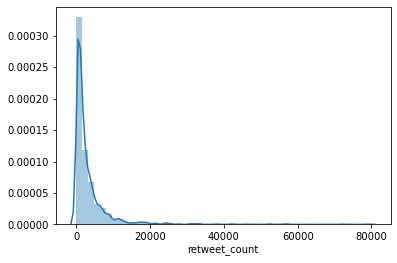

In [132]:
sns.distplot(df_final["retweet_count"])

In [204]:
df_final["favourite_count"].describe()

count      2354.000000
mean       9804.231946
std       14046.936186
min          52.000000
25%        2046.000000
50%        4457.500000
75%       12579.250000
max      229185.000000
Name: favourite_count, dtype: float64

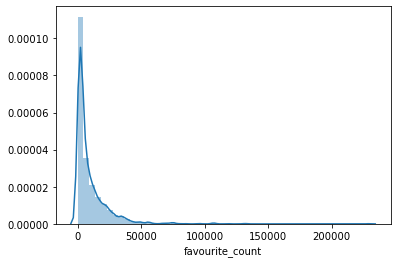

In [124]:
sns.distplot(df_final["favourite_count"])

#### Retweet count for each type of dog?

In [187]:
# check all doggo values are actually dogs?
cc = df_final[df_final['doggo'] == "doggo"]
cc.p1.unique()

array(['golden_retriever', 'German_short-haired_pointer',
       'Great_Pyrenees', 'tennis_ball', 'Staffordshire_bullterrier',
       'Eskimo_dog', 'Labrador_retriever', 'barrow', 'ox', 'borzoi',
       'muzzle', 'dalmatian', 'Bedlington_terrier', 'goose',
       'German_shepherd', 'web_site', 'geyser',
       'Chesapeake_Bay_retriever', 'Blenheim_spaniel', 'patio', 'lion',
       'beagle', 'long-horned_beetle', 'briard', 'porcupine',
       'cocker_spaniel', 'Border_collie', 'vacuum', 'Great_Dane',
       'Norwegian_elkhound', 'Siberian_husky', 'curly-coated_retriever',
       'standard_poodle', 'prison', 'bathtub', 'Pomeranian',
       'Irish_setter', 'Old_English_sheepdog', 'whippet', 'Pembroke',
       'boxer', 'toilet_tissue', 'mortarboard', 'Dandie_Dinmont',
       'English_springer', 'flat-coated_retriever', 'Chihuahua',
       'komondor', nan], dtype=object)

In [162]:
df_final.groupby(by='doggo').count()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,rating_numerator,rating_denominator,name,floofer,pupper,puppo,source_link,source_text,retweet_count,favourite_count
doggo,,,,,,,,,,,,,,,,,,,,,
doggo,97,80,80,80,80,80,80,80,80,80,...,97,97,53,1,12,1,89,89,97,97


In [164]:
df_final.groupby(by='doggo').retweet_count.sum()

doggo
doggo    712927.0
Name: retweet_count, dtype: float64

[Text(0, 0.5, 'Total_retweet_count'),
 Text(0.5, 0, 'Type of dog'),
 Text(0.5, 1.0, 'Favourite count for each type of dog')]

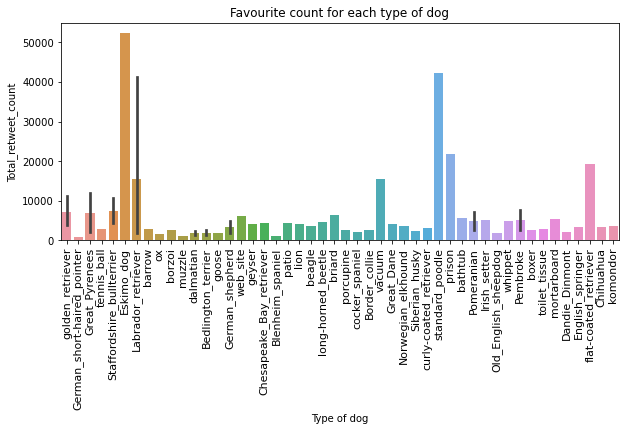

In [206]:
# plot barplot
plt.figure(figsize=(10,4))
rv = sns.barplot(x='p1', y = 'retweet_count', data=cc)
plt.xticks(rotation=90, fontsize=11)
rv.set(xlabel='Type of dog', ylabel='Total_retweet_count', title= "Favourite count for each type of dog")
# Highest total retweet count - Eskimo_dog followev by standard_poodle

#### Favourite count for each type of dog?

[Text(0, 0.5, 'Total_favourite_count'),
 Text(0.5, 0, 'Type of dog'),
 Text(0.5, 1.0, 'Favourite count for each type of dog')]

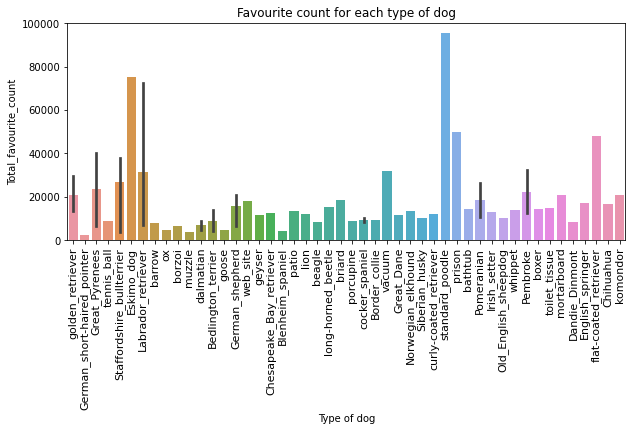

In [196]:
# plot barplot
plt.figure(figsize=(10,4))
fv = sns.barplot(x='p1', y = 'favourite_count', data=cc)
plt.xticks(rotation=90, fontsize=11)
fv.set(xlabel='Type of dog', ylabel='Total_favourite_count', title= "Favourite count for each type of dog")
# Highest total favourite count - Standard_poodle followed by Eskimo_dog

## Appendix

In [1]:
import glob
import pandas as pd

In [53]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
with open(r'C:\Users\Free\Web scraping\4. Data Wrangling\Udacity tweepy code\tweet-json_.txt', encoding='utf-8') as file:
    for i in range(2355):
        tweet = file.readline() 
        # Append to list of dictionaries
        df_list.append({'tweet': tweet
                       })
df = pd.DataFrame(df_list, columns = ['tweet'])
df.head(4)

,tweet
0,"{""created_at"": ""Tue Aug 01 16:23:56 +0000 2017..."
1,"{""created_at"": ""Tue Aug 01 00:17:27 +0000 2017..."
2,"{""created_at"": ""Mon Jul 31 00:18:03 +0000 2017..."
3,"{""created_at"": ""Sun Jul 30 15:58:51 +0000 2017..."


# Cleaned data

In [9]:
# Extracting 
df["id"] = df["tweet"].str.extract(r'([a-zA-Z"]+:\s[0-9]+)', expand=True)[0].str.split(':', expand=True)[1]
df["retweet"] = df["tweet"].str.extract(r'(("retweet_count")+:\s[0-9]+)', expand=True)[0].str.split(':', expand=True)[1]
df["favourites"] = df["tweet"].str.extract(r'(("favorite_count")+:\s[0-9]+)', expand=True)[0].str.split(':', expand=True)[1]
df = df[["id","retweet","favourites"]]
df.head()

,id,retweet,favourites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Test output dataframe

In [14]:
# check no letters in columns
id = df["id"].str.contains(r'[a-zA-Z]').sum()
ret = df["retweet"].str.contains(r'[a-zA-Z]').sum()
fav = df["favourites"].str.contains(r'[a-zA-Z]').sum()

print(f'id : {id}')
print(f'retweet_count : {ret}')
print(f'favourite_count : {fav}')

id : 0
retweet_count : 0
favourite_count : 0


# Lessons learned
- Choose which output of split to choose using [n]. This saves time deleting cols later on.
- combine split and extract reduces code
- regex